In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [13]:
# Loading layoffs dataset
df = pd.read_csv("layoffs.csv")
print(df.shape)     
df.head()

(4202, 11)


,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Sonder,SF Bay Area,NaN,11/10/2025,1.00,Travel,https://skift.com/2025/11/10/sonder-shuts-down...,Post-IPO,839.0,United States,11/10/2025
1,Axonius,New York City,100.0,11/6/2025,0.11,Security,https://www.calcalistech.com/ctechnews/article...,Series E,865.0,United States,11/7/2025
2,MyBambu,Memphis,141.0,11/5/2025,1.00,Finance,https://cbs12.com/news/local/new-west-palm-bea...,Unknown,15.0,United States,11/7/2025
3,Hewlett Packard Enterprise,SF Bay Area,52.0,11/5/2025,NaN,Hardware,https://www.sfchronicle.com/tech/article/layof...,Post-IPO,1400.0,United States,11/7/2025
4,Indeed,Austin,NaN,11/5/2025,NaN,HR,https://www.businessinsider.com/indeed-layoffs...,Acquired,5.0,United States,11/8/2025


In [3]:
# Preprocessing dates and creating time features
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["year_month"] = df["date"].dt.to_period("M").astype(str)

df = df.sort_values("date")

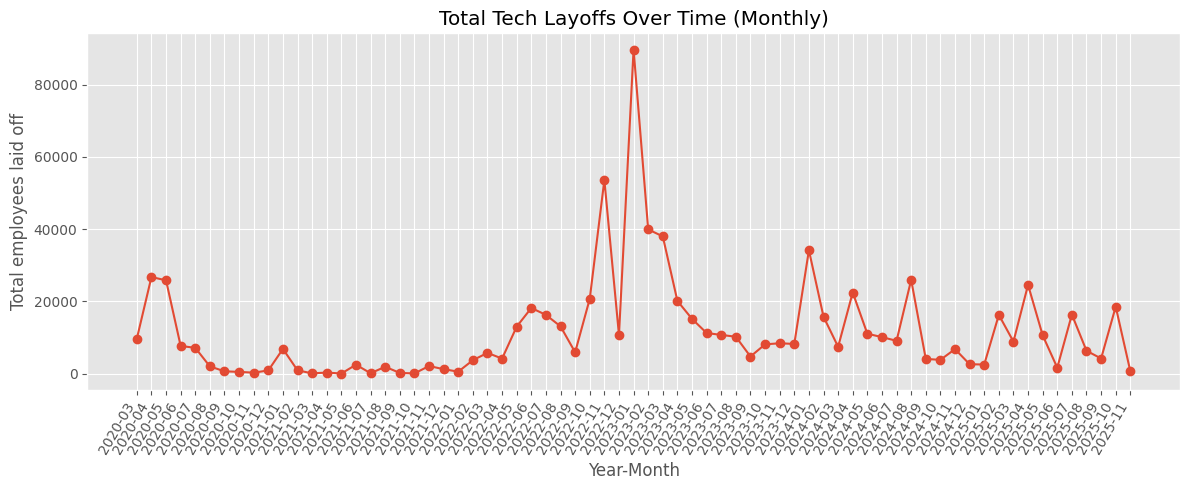

In [ ]:
# Visualization 1: Total layoffs over time by month
monthly_layoffs = (
    df.groupby("year_month", observed=False)["total_laid_off"]
    .sum()
    .reset_index()
    .dropna()
)

plt.figure(figsize=(12, 5))
plt.plot(monthly_layoffs["year_month"], monthly_layoffs["total_laid_off"], marker="o")
plt.xticks(rotation=60, ha="right")
plt.xlabel("Year-Month")
plt.ylabel("Total employees laid off")
plt.title("Total Tech Layoffs Over Time (Monthly)")
plt.tight_layout()
plt.show()

# Confirming the below chart numbers
# https://www.statista.com/chart/29421/number-of-workers-laid-off-worldwide-in-the-tech-startup-sector-since-jan-2022/

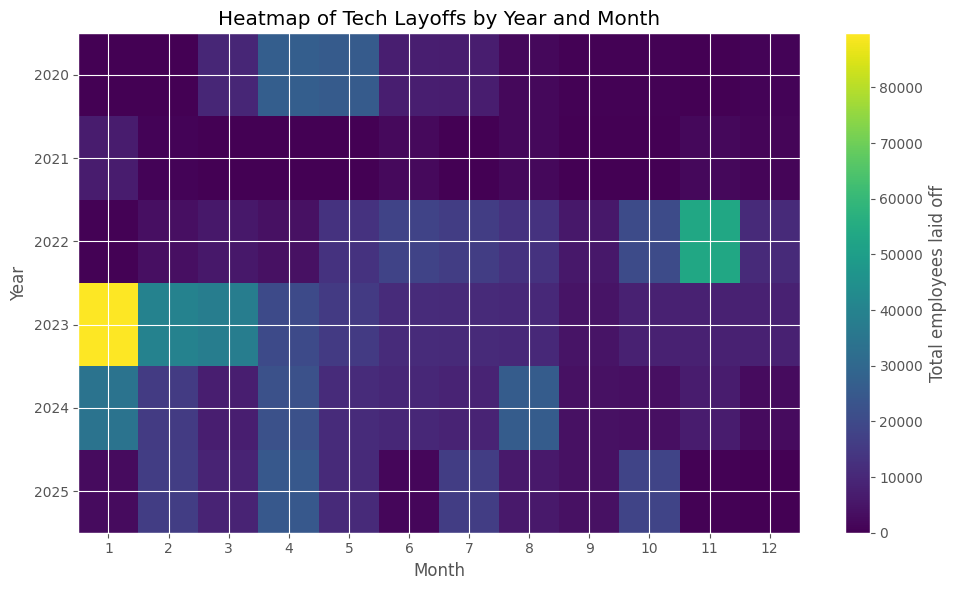

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,0.0,0.0,9628.0,26710.0,25804.0,7627.0,7112.0,1969.0,609.0,450.0,237.0,852.0
2021,6813.0,868.0,47.0,261.0,0.0,2434.0,80.0,1867.0,161.0,22.0,2070.0,1200.0
2022,510.0,3685.0,5714.0,4128.0,12985.0,18144.0,16238.0,13055.0,5881.0,20671.0,53594.0,10664.0
2023,89709.0,39902.0,37963.0,20100.0,15127.0,11206.0,10690.0,10178.0,4707.0,8076.0,8373.0,8189.0
2024,34137.0,15729.0,7403.0,22423.0,11011.0,10083.0,9051.0,25944.0,4036.0,3782.0,6755.0,2568.0
2025,2492.0,16234.0,8834.0,24545.0,10577.0,1606.0,16327.0,6302.0,4152.0,18510.0,643.0,0.0


In [12]:
# Visualization 2: Layoffs heatmap by year and month
heat_df = df.dropna(subset=["year", "month", "total_laid_off"])

pivot = heat_df.pivot_table(
    index="year",
    columns="month",
    values="total_laid_off",
    aggfunc="sum"
).fillna(0)

plt.figure(figsize=(10, 6))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Total employees laid off")
plt.xticks(ticks=np.arange(0, 12), labels=range(1, 13))
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Heatmap of Tech Layoffs by Year and Month")
plt.tight_layout()
plt.show()

pivot

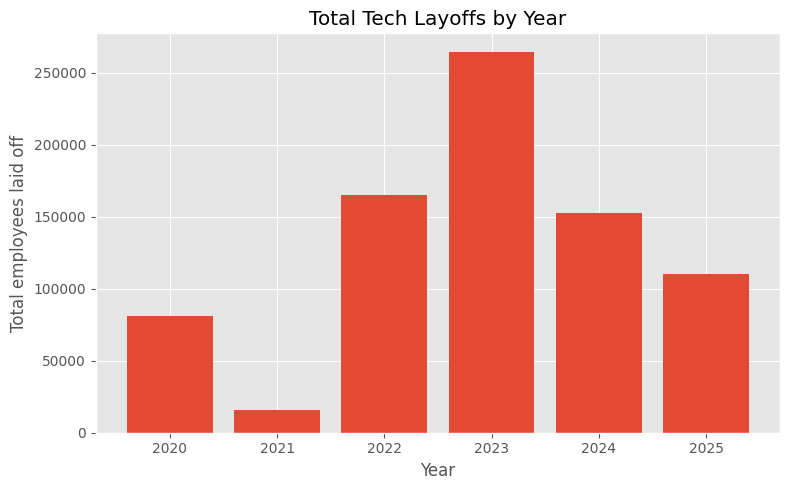

In [ ]:
# Visualization 3: Total layoffs by year
yearly_layoffs = (
    df.groupby("year", observed=False)["total_laid_off"]
    .sum()
    .reset_index()
    .dropna()
)

plt.figure(figsize=(8, 5))
plt.bar(yearly_layoffs["year"].astype(str), yearly_layoffs["total_laid_off"])
plt.xlabel("Year")
plt.ylabel("Total employees laid off")
plt.title("Total Tech Layoffs by Year")
plt.tight_layout()
plt.show()

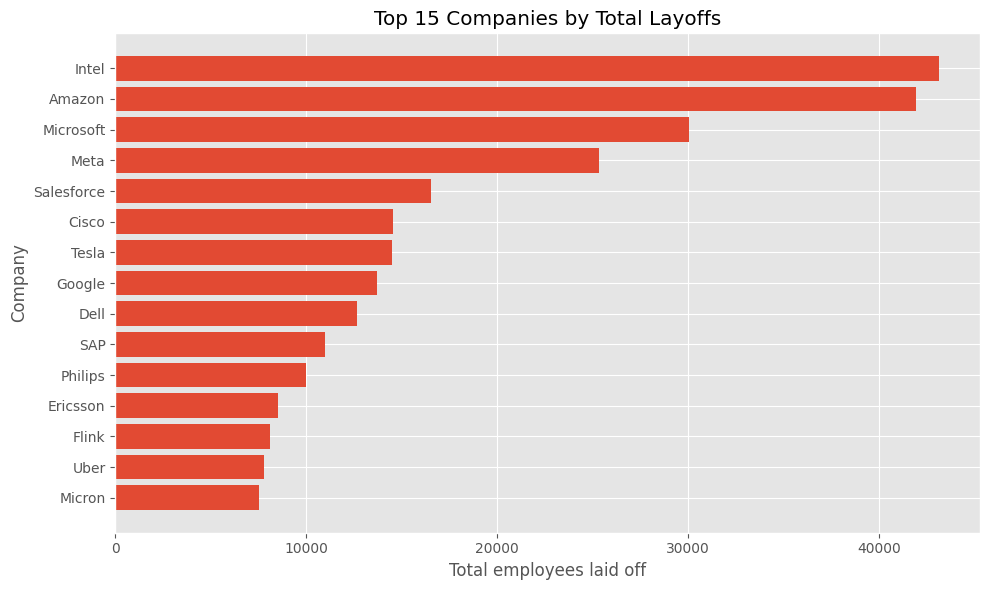

In [ ]:
# Visualization 4: Top 15 companies by total layoffs
company_layoffs = (
    df.groupby("company", observed=False)["total_laid_off"]
    .sum()
    .reset_index()
    .dropna()
    .sort_values("total_laid_off", ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
plt.barh(company_layoffs["company"][::-1], company_layoffs["total_laid_off"][::-1])
plt.xlabel("Total employees laid off")
plt.ylabel("Company")
plt.title("Top 15 Companies by Total Layoffs")
plt.tight_layout()
plt.show()

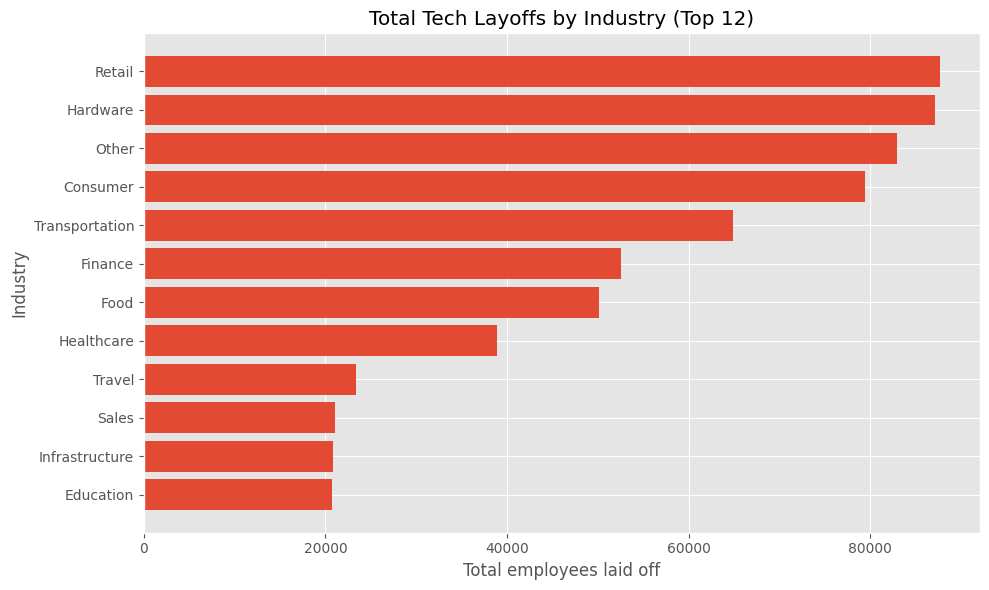

In [ ]:
# Visualization 5: Total layoffs by industry
industry_layoffs = (
    df.groupby("industry", observed=False)["total_laid_off"]
    .sum()
    .reset_index()
    .dropna()
    .sort_values("total_laid_off", ascending=False)
)

top_industries = industry_layoffs.head(12)

plt.figure(figsize=(10, 6))
plt.barh(top_industries["industry"][::-1], top_industries["total_laid_off"][::-1])
plt.xlabel("Total employees laid off")
plt.ylabel("Industry")
plt.title("Total Tech Layoffs by Industry (Top 12)")
plt.tight_layout()
plt.show()

/var/folders/40/sdhd020s23j5xmv9v34h73pm0000gn/T/ipykernel_47425/957160873.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_industry_names, showfliers=False)


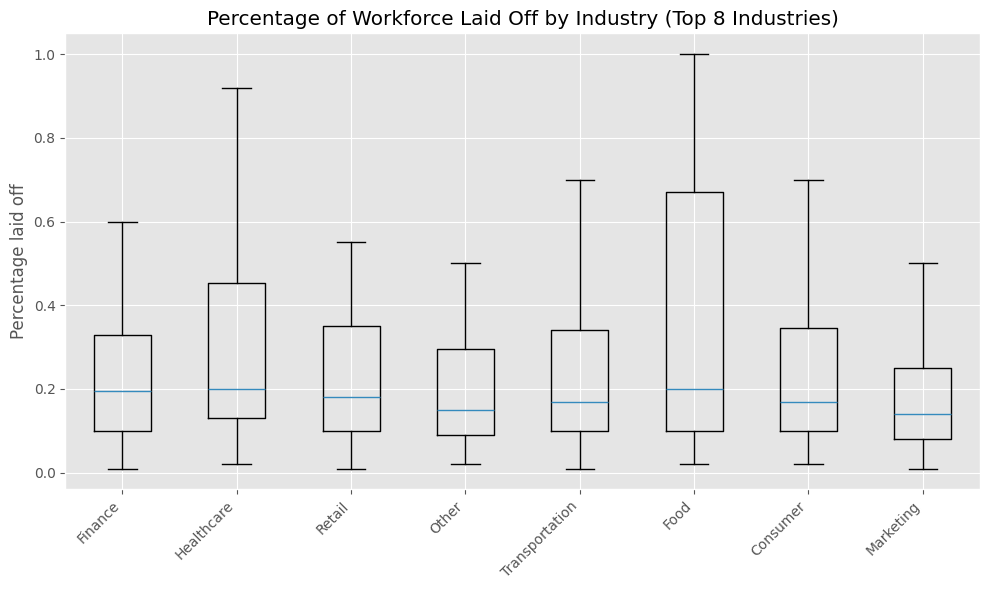

In [ ]:
# Visualization 6: Distribution of percentage laid off by industry
perc_df = df[["industry", "percentage_laid_off"]].dropna()
top_industry_names = (
    perc_df["industry"].value_counts().head(8).index.tolist()
)
perc_df = perc_df[perc_df["industry"].isin(top_industry_names)]

plt.figure(figsize=(10, 6))
data = [perc_df[perc_df["industry"] == ind]["percentage_laid_off"] for ind in top_industry_names]
plt.boxplot(data, labels=top_industry_names, showfliers=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage laid off")
plt.title("Percentage of Workforce Laid Off by Industry (Top 8 Industries)")
plt.tight_layout()
plt.show()

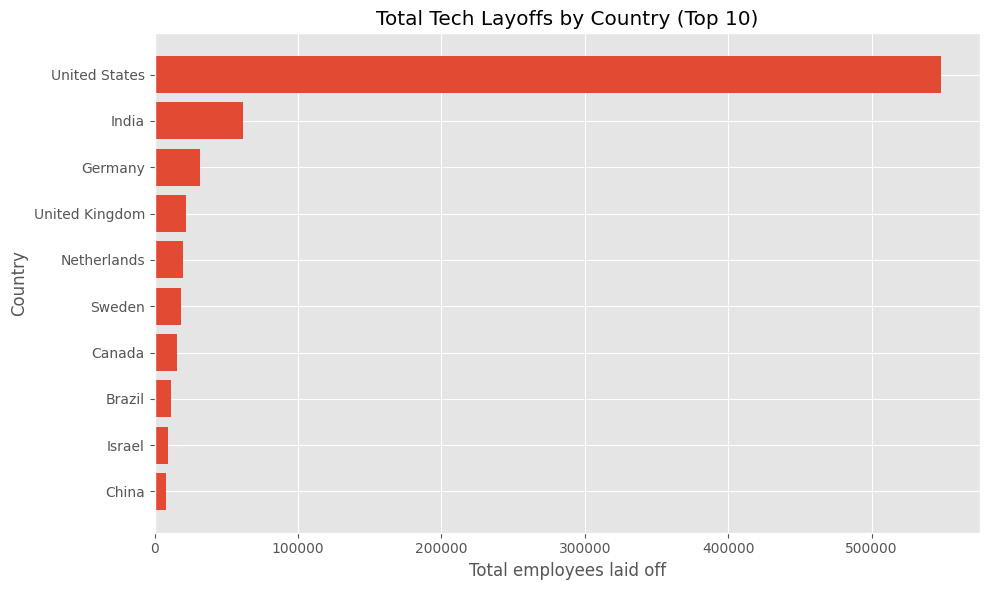

In [ ]:
# Visualization 7: Total layoffs by country
country_layoffs = (
    df.groupby("country", observed=False)["total_laid_off"]
    .sum()
    .reset_index()
    .dropna()
    .sort_values("total_laid_off", ascending=False)
)

top_countries = country_layoffs.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_countries["country"][::-1], top_countries["total_laid_off"][::-1])
plt.xlabel("Total employees laid off")
plt.ylabel("Country")
plt.title("Total Tech Layoffs by Country (Top 10)")
plt.tight_layout()
plt.show()